<a href="https://colab.research.google.com/github/Swathi1309/Data_Analytics/blob/main/Predicting%20Survivors%20of%20the%20Titanic%20Shipwreck%20using%20Logistic%20Regression/Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression for Predicting Survival using the Titanic Dataset

## Importing libraries

In [28]:
import pandas as pd
import numpy as np

import random
import re

import missingno as msno

import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, plot_roc_curve

## Data cleaning

In [29]:
data = pd.read_csv("train.csv")

# Data Cleaning
# Dropping columns that are not relevant
to_drop = ['Name', 'Ticket', 'PassengerId']
data.drop(columns=to_drop, inplace=True)
# Dropping rows where embarked is not available
data.dropna(subset=['Embarked'], inplace=True)
# Converting categorical variables to one-hot encodings
sex = pd.get_dummies(data["Sex"])
embarked = pd.get_dummies(data["Embarked"])
data = pd.concat([data,sex,embarked],axis=1)

In [30]:
print ("Total number of observations:", len(data))
print ("Distribution of observations based on the target variable:")
data['Survived'].value_counts()

Total number of observations: 889
Distribution of observations based on the target variable:


0    549
1    340
Name: Survived, dtype: int64

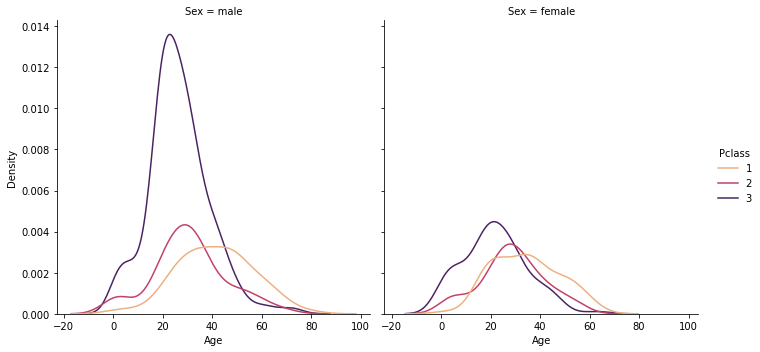

In [31]:
# Data imputation for Age feature
sb.displot(data, x='Age', hue='Pclass', kind='kde', col='Sex', palette='flare');
data['Age'] = data.groupby(['Pclass'])['Age'].apply(lambda x:x.fillna(x.median()))

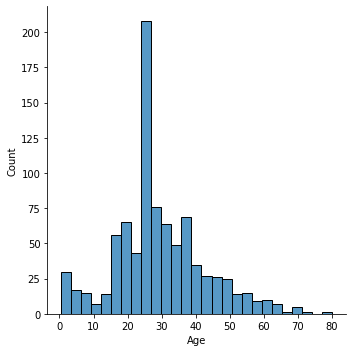

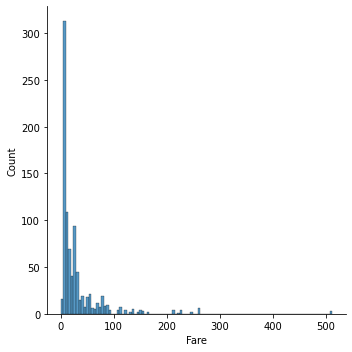

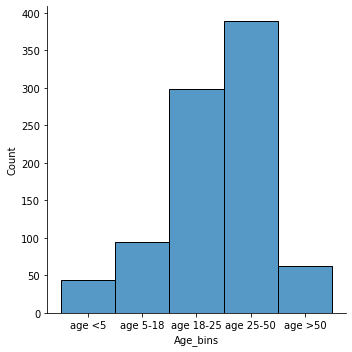

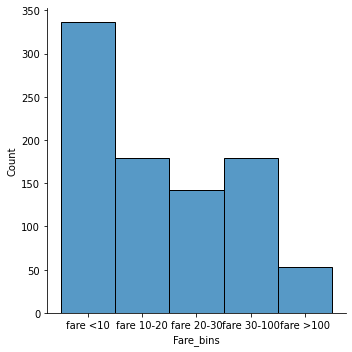

In [32]:
# Creating categorical variables from continuous variables, and creating one-hot encodings for the same
sb.displot(data, x="Age", palette='flare');
sb.displot(data, x="Fare", palette='flare');

data['Age_bins'] = pd.cut(data['Age'], bins=[data['Age'].min()-1,5,18,25,50,data['Age'].max()+1], labels=['age <5', 'age 5-18', 'age 18-25', 'age 25-50','age >50'])
data['Fare_bins'] = pd.cut(data['Fare'], bins=[data['Fare'].min()-1, 10, 20, 30, 100, data['Fare'].max()+1], labels=['fare <10', 'fare 10-20','fare 20-30','fare 30-100','fare >100'])

sb.displot(data, x="Age_bins", palette='flare');
sb.displot(data, x="Fare_bins", palette='flare');

age_bins = pd.get_dummies(data['Age_bins'])
fare_bins = pd.get_dummies(data['Fare_bins'])
data = pd.concat([data, age_bins, fare_bins], axis=1)

In [33]:
normalized_age =(data['Age']-data['Age'].min())/(data['Age'].max()-data['Age'].min())
data['Age'] = normalized_age

normalized_fare = (data['Fare']-data['Fare'].min())/(data['Fare'].max()-data['Fare'].min())
data['Fare'] = normalized_fare

## Data Visualization and Exploratory Analysis

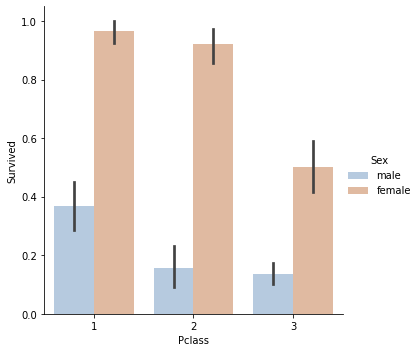

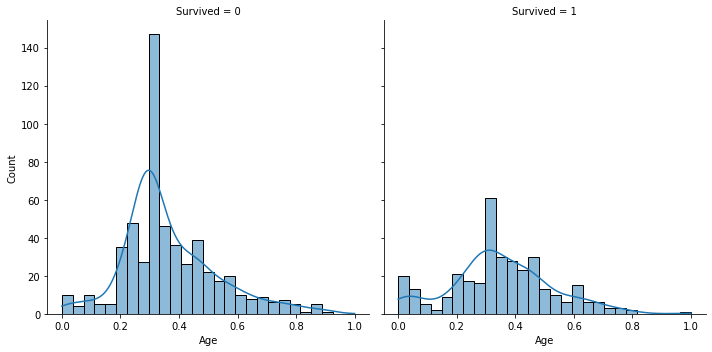

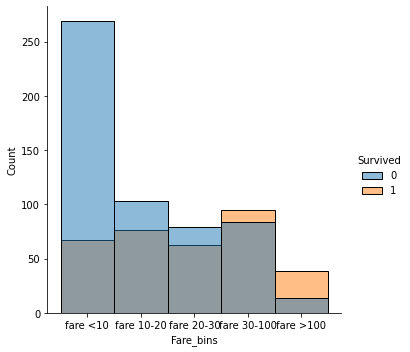

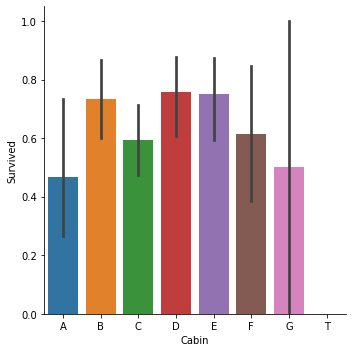

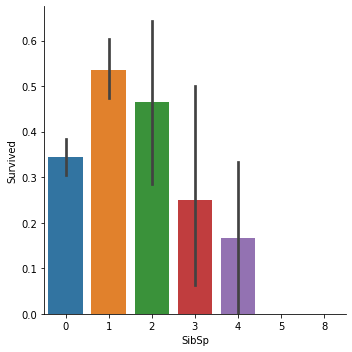

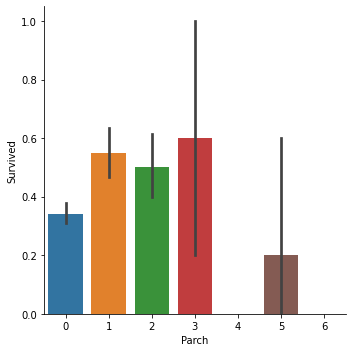

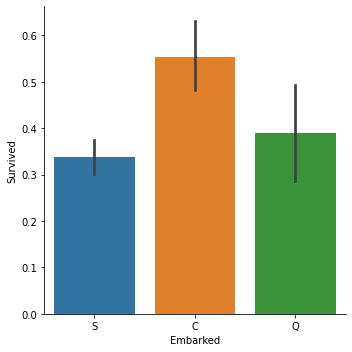

In [34]:
sb.catplot(x="Pclass", y="Survived", hue='Sex', data=data, saturation=.5, kind="bar", palette='pastel');

sb.displot(data=data, x='Age', kde=True, col='Survived');
sb.displot(data=data, x='Fare_bins', hue='Survived');

data['Cabin'] = data['Cabin'].apply(lambda s:s[0] if pd.notnull(s) else s)
sb.catplot(x='Cabin', y='Survived', data=data, kind='bar', order = ['A','B','C','D','E','F','G','T']);

sb.catplot(x="SibSp", y="Survived",data=data, kind="bar");
sb.catplot(x="Parch", y="Survived",data=data, kind="bar");
sb.catplot(x="Embarked", y="Survived",data=data, kind="bar");

## Building and Comparing Regression Models

In [35]:
data.drop(columns=['Cabin'], inplace=True)
X_continous = data[['Pclass', 'male', 'Age', 'SibSp', 'Parch', 'Fare', 'C', 'Q']]
X_selected = data[['Pclass', 'male', 'Age']]
X_classes = data[['Pclass', 'male', 'age <5', 'age 5-18', 'age 18-25', 'age 25-50', 'fare <10', 'fare 10-20', 'fare 20-30', 'fare 30-100', 'SibSp', 'Parch', 'C', 'Q']]
Y = data['Survived']

In [36]:
def print_coeff(model, features, scores):
  print (model, ": \n")
  for i in range(len(features)):
    print (features[i], " :", scores[0, i])

Model1 : 

Pclass  : -1.066546575405164
male  : -2.6183088121857288
Age  : -2.2355603621938123
SibSp  : -0.35093040304056533
Parch  : -0.03237896992958964
Fare  : 0.036738023913887564
C  : 0.5928621961596389
Q  : 0.26193481926588225
Training data:
Confusion matrix:
[[331  70]
 [ 49 172]]
Accuracy:  0.8086816720257235
Precision:  0.7107438016528925
Recall:  0.7782805429864253
F1_score:  0.7429805615550755


Validation data:
Confusion matrix:
[[149  32]
 [ 20  66]]
Accuracy:  0.8052434456928839
Precision:  0.673469387755102
Recall:  0.7674418604651163
F1_score:  0.7173913043478259


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


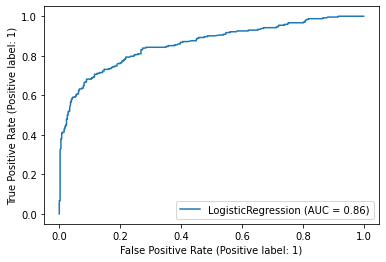

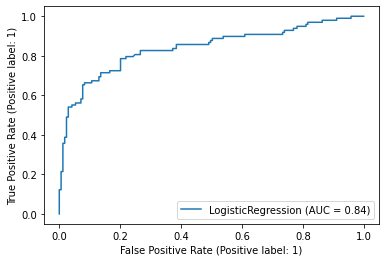

In [37]:
# Model 1 - Using continous values for age and fare
x_train, x_test, y_train, y_test = train_test_split(X_continous, Y, test_size=0.3, random_state=10)
model1 = LogisticRegression(max_iter=5000)
model1.fit(x_train, y_train)
print_coeff("Model1", ['Pclass', 'male', 'Age', 'SibSp', 'Parch', 'Fare', 'C', 'Q'], model1.coef_)
# For training data
y_pred = model1.predict(x_train)
print ("Training data:")
print ("Confusion matrix:")
print (confusion_matrix(y_pred, y_train))
print ("Accuracy: ", accuracy_score(y_pred, y_train))
print ("Precision: ", precision_score(y_pred, y_train))
print ("Recall: ", recall_score(y_pred, y_train))
print ("F1_score: ", f1_score(y_pred, y_train))
plot_roc_curve(model1, x_train, y_train)
print ("\n")
# For validation data
y_pred = model1.predict(x_test)
print ("Validation data:")
print ("Confusion matrix:")
print (confusion_matrix(y_pred, y_test))
print ("Accuracy: ", accuracy_score(y_pred, y_test))
print ("Precision: ", precision_score(y_pred, y_test))
print ("Recall: ", recall_score(y_pred, y_test))
print ("F1_score: ", f1_score(y_pred, y_test))
plot_roc_curve(model1, x_test, y_test)

Model 2


Training data:
Confusion matrix:
[[331  66]
 [ 49 176]]
Accuracy:  0.815112540192926
Precision:  0.7272727272727273
Recall:  0.7822222222222223
F1_score:  0.7537473233404711


Validation data:
Confusion matrix:
[[148  32]
 [ 21  66]]
Accuracy:  0.8014981273408239
Precision:  0.673469387755102
Recall:  0.7586206896551724
F1_score:  0.7135135135135136


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


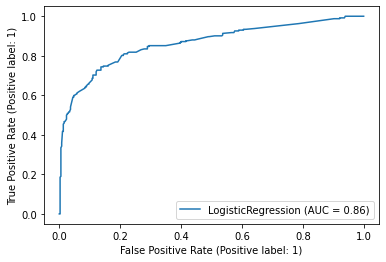

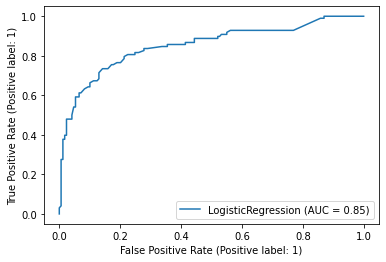

In [38]:
# Model 2 - Using binned values for age and fare
x_train, x_test, y_train, y_test = train_test_split(X_classes, Y, test_size=0.3, random_state=10)
model2 = LogisticRegression(max_iter=5000)
model2.fit(x_train, y_train)

print ("Model 2")
print ("\n")
# For training data
y_pred = model2.predict(x_train)
print ("Training data:")
print ("Confusion matrix:")
print (confusion_matrix(y_pred, y_train))
print ("Accuracy: ", accuracy_score(y_pred, y_train))
print ("Precision: ", precision_score(y_pred, y_train))
print ("Recall: ", recall_score(y_pred, y_train))
print ("F1_score: ", f1_score(y_pred, y_train))
plot_roc_curve(model2, x_train, y_train)
print ("\n")
# For validation data
y_pred = model2.predict(x_test)
print ("Validation data:")
print ("Confusion matrix:")
print (confusion_matrix(y_pred, y_test))
print ("Accuracy: ", accuracy_score(y_pred, y_test))
print ("Precision: ", precision_score(y_pred, y_test))
print ("Recall: ", recall_score(y_pred, y_test))
print ("F1_score: ", f1_score(y_pred, y_test))
plot_roc_curve(model2, x_test, y_test)

In [39]:
# Model 3 - Using only a subset of the given features
x_train, x_test, y_train, y_test = train_test_split(X_selected, Y, test_size=0.3, random_state=10)
model3 = LogisticRegression(max_iter=5000)
model3.fit(x_train, y_train)

print ("Model 3")
print ("\n")
# For training data
y_pred = model3.predict(x_train)
print ("Training data:")
print ("Confusion matrix:")
print (confusion_matrix(y_pred, y_train))
print ("Accuracy: ", accuracy_score(y_pred, y_train))
print ("Precision: ", precision_score(y_pred, y_train))
print ("Recall: ", recall_score(y_pred, y_train))
print ("F1_score: ", f1_score(y_pred, y_train))
print ("\n")
# For validation data
y_pred = model3.predict(x_test)
print ("Validation data:")
print ("Confusion matrix:")
print (confusion_matrix(y_pred, y_test))
print ("Accuracy: ", accuracy_score(y_pred, y_test))
print ("Precision: ", precision_score(y_pred, y_test))
print ("Recall: ", recall_score(y_pred, y_test))
print ("F1_score: ", f1_score(y_pred, y_test))

Model 3


Training data:
Confusion matrix:
[[324  69]
 [ 56 173]]
Accuracy:  0.7990353697749196
Precision:  0.7148760330578512
Recall:  0.7554585152838428
F1_score:  0.7346072186836518


Validation data:
Confusion matrix:
[[149  34]
 [ 20  64]]
Accuracy:  0.797752808988764
Precision:  0.6530612244897959
Recall:  0.7619047619047619
F1_score:  0.7032967032967032


# Predicting Survival from the Test Dataset

In [40]:
test_data = pd.read_csv("test.csv")

# Data cleaning as done for training data
to_drop = ['Name', 'Ticket', 'PassengerId']
test_data.drop(columns=to_drop, inplace=True)

test_data['Age'] = test_data.groupby(['Pclass'])['Age'].apply(lambda x:x.fillna(x.median()))
test_data['Fare'] = test_data.groupby(['Pclass'])['Fare'].apply(lambda x:x.fillna(x.median()))

sex = pd.get_dummies(test_data["Sex"])
embarked = pd.get_dummies(test_data["Embarked"])
test_data = pd.concat([test_data,sex,embarked],axis=1)

normalized_age =(test_data['Age']-test_data['Age'].min())/(test_data['Age'].max()-test_data['Age'].min())
test_data['Age'] = normalized_age

normalized_fare = (test_data['Fare']-test_data['Fare'].min())/(test_data['Fare'].max()-test_data['Fare'].min())
test_data['Fare'] = normalized_fare

test_data.drop(columns=['Cabin'], inplace=True)
test_data.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
female      0
male        0
C           0
Q           0
S           0
dtype: int64

In [41]:
x = test_data[['Pclass', 'male', 'Age', 'SibSp', 'Parch', 'Fare', 'C', 'Q']]
y = model1.predict(x)
test = pd.read_csv("test.csv")
survived = pd.DataFrame(y)
survived.columns = ["Survived"]
predictions = pd.concat([test, survived], axis=1)
predictions.to_csv('predictions.csv')
survived["Survived"].value_counts()

0    261
1    157
Name: Survived, dtype: int64